# Ex7b - Principal Component Analysis (PCA)
PCA consists in two computational steps:
* Compute the covariance matrix of the data
* Compute the eigenvectors $U_1, U_2,.., U_n$

Before using the data it is important to normalize and use the same scale for each dimension.

In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Load and visualiza the data

In [2]:
# Loading all data on a dictonary
data = loadmat('ex7data1.mat')

# Convert the data into a numpy array
X = data['X']

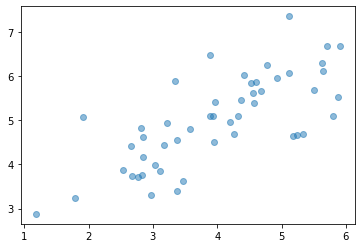

In [3]:
plt.scatter(X[:,0],X[:,1], marker='o', alpha=0.5)

## Normalize the data
returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.

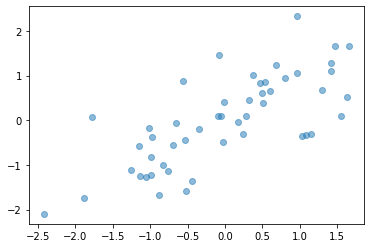

In [4]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
plt.scatter(X_std[:,0],X_std[:,1], marker='o', alpha=0.5)

## Run principal component analysis on the dataset

In [5]:
m, n = X_std.shape
# K is the desired number of dimensions to reduce to 
K = 1

# Calculate the covariance matrix
sigma = (1/m)*np.dot(X_std.T, X_std)

# Calculate the eigenvectors
eigVal, eigVec = np.linalg.eig(sigma)

<code>eigVal</code> is an 1-D array containing the eigenvalues of <code>sigma</code>.

In [6]:
eigVal

array([1.73553038, 0.26446962])

<code>eigVec</code> is a 2-D square array of the corresponding eigenvectors (in columns). The column <code>eigVec[:, i]</code> is the normalized eigenvector corresponding to the eigenvalue <code>w[i]</code>. Will return a matrix object if a is a matrix object.

In [7]:
eigVec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

<b>The eigenvalues define the magnitude of the eigenvectors</b>. We are interested in the top $k$ eigenvectors based on the values of their corresponding eigenvalues. Therefore the steps will be now:
* Select $k$ eigenvectors, which correspond to the $k$ largest eigenvalues, where $k$ is the dimensionality of the new subspace
* Construct a projection matrix, <b>$W$</b>, from the top $k$ eigenvectors
* Transform the $d$-dimensional input dataset, <b>$X$</b>, using the projection matrix, <b>$W$</b>, to obtain the new $k$-dimensional feature subspace. 

The number $k$ has to be determined by a tradeoff betweek computational efficiency and the performance of the classifier.

In [8]:
# list of eigenvalue, eigenvector tuples
# We set the absolute value of any eigenvalues
eigPairs = [(np.abs(eigVal[i]), eigVec[:, i]) for i in range(len(eigVal))]

In [9]:
eigPairs

[(1.7355303763393295, array([0.70710678, 0.70710678])),
 (0.2644696236606705, array([-0.70710678,  0.70710678]))]

In [10]:
# Sorting the tuple 
eigPairs.sort(key=lambda k: k[0], reverse=True)

In [11]:
eigPairs

[(1.7355303763393295, array([0.70710678, 0.70710678])),
 (0.2644696236606705, array([-0.70710678,  0.70710678]))]

In [134]:
# Creating the W matrix with the k top eigenvectors
W = np.empty((n, 0))
for i in range(K): W = np.concatenate((W, eigPairs[i][1][:, np.newaxis]), axis=1)

In [135]:
W

array([[0.70710678],
       [0.70710678]])

In [136]:
X_pca = np.dot(X_std, W)

In [139]:
X_pca

array([[-1.49631261],
       [ 0.92218067],
       [-1.22439232],
       [-1.64386173],
       [-1.2732206 ],
       [ 0.97681976],
       [-1.26881187],
       [ 2.34148278],
       [ 0.02999141],
       [ 0.78171789],
       [ 0.6316777 ],
       [ 0.55280135],
       [ 0.0896816 ],
       [ 0.5258541 ],
       [-1.56415455],
       [ 1.91610366],
       [ 0.88679735],
       [-0.95607375],
       [ 2.32995679],
       [ 0.47793862],
       [ 2.21747195],
       [-0.38900633],
       [ 1.78482346],
       [-0.05175486],
       [-1.66512392],
       [-0.50813572],
       [ 1.23711018],
       [ 1.17198677],
       [-0.84221686],
       [ 0.00693174],
       [ 0.22794195],
       [ 1.51309518],
       [-1.33874082],
       [ 0.5925244 ],
       [-0.67907605],
       [ 1.35298   ],
       [-1.68749495],
       [ 1.39235931],
       [-2.55992598],
       [ 0.27850702],
       [ 0.97677692],
       [-0.88820006],
       [-1.29666127],
       [ 0.98966774],
       [-1.81272352],
       [ 0

## Recovering the data back to the original space

In [137]:
X_rec = np.dot(X_pca, W.T)

In [138]:
X_rec

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802],
       [ 0.44666359,  0.44666359],
       [ 0.39088959,  0.39088959],
       [ 0.06341447,  0.06341447],
       [ 0.371835  ,  0.371835  ],
       [-1.10602429, -1.10602429],
       [ 1.35488989,  1.35488989],
       [ 0.62706042,  0.62706042],
       [-0.67604623, -0.67604623],
       [ 1.64752825,  1.64752825],
       [ 0.33795364,  0.33795364],
       [ 1.56798945,  1.56798945],
       [-0.27506901, -0.27506901],
       [ 1.26206077,  1.26206077],
       [-0.03659622, -0.03659622],
       [-1.17742041, -1.17742041],
       [-0.35930621, -0.35930621],
       [ 0.874769  ,  0.874769  ],
       [ 0.82871979,  0.82871979],
       [-0.59553725,